In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Introduction:


An additional safety metric is misdemeanor offenses. Many misdemeanor offenses can be a threat to one's safety and they also can act as indicators of a neighborhoods demeanor. If a neighborhood appears "sketchy" a homeowner will most likely feel unsafe. 
 
The measure for implimenting misdeamors into our overall metric was the same as the other sub-metrics - counting to see which neighborhood had the most incidents.

In [2]:
citation_data = pd.read_csv("https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86", index_col="_id")

In [3]:
df_citation_frame = citation_data['NEIGHBORHOOD'].value_counts().reset_index()
df_citation_frame.columns = ['hood name', '# of incidents']
df_citation_frame

,hood name,# of incidents
0,South Side Flats,3411
1,Central Business District,2001
2,Central Oakland,664
3,North Shore,577
4,Carrick,453
...,...,...
92,St. Clair,3
93,Chartiers City,3
94,Outside State,2
95,Mt. Oliver Boro,2


Showing Visusally

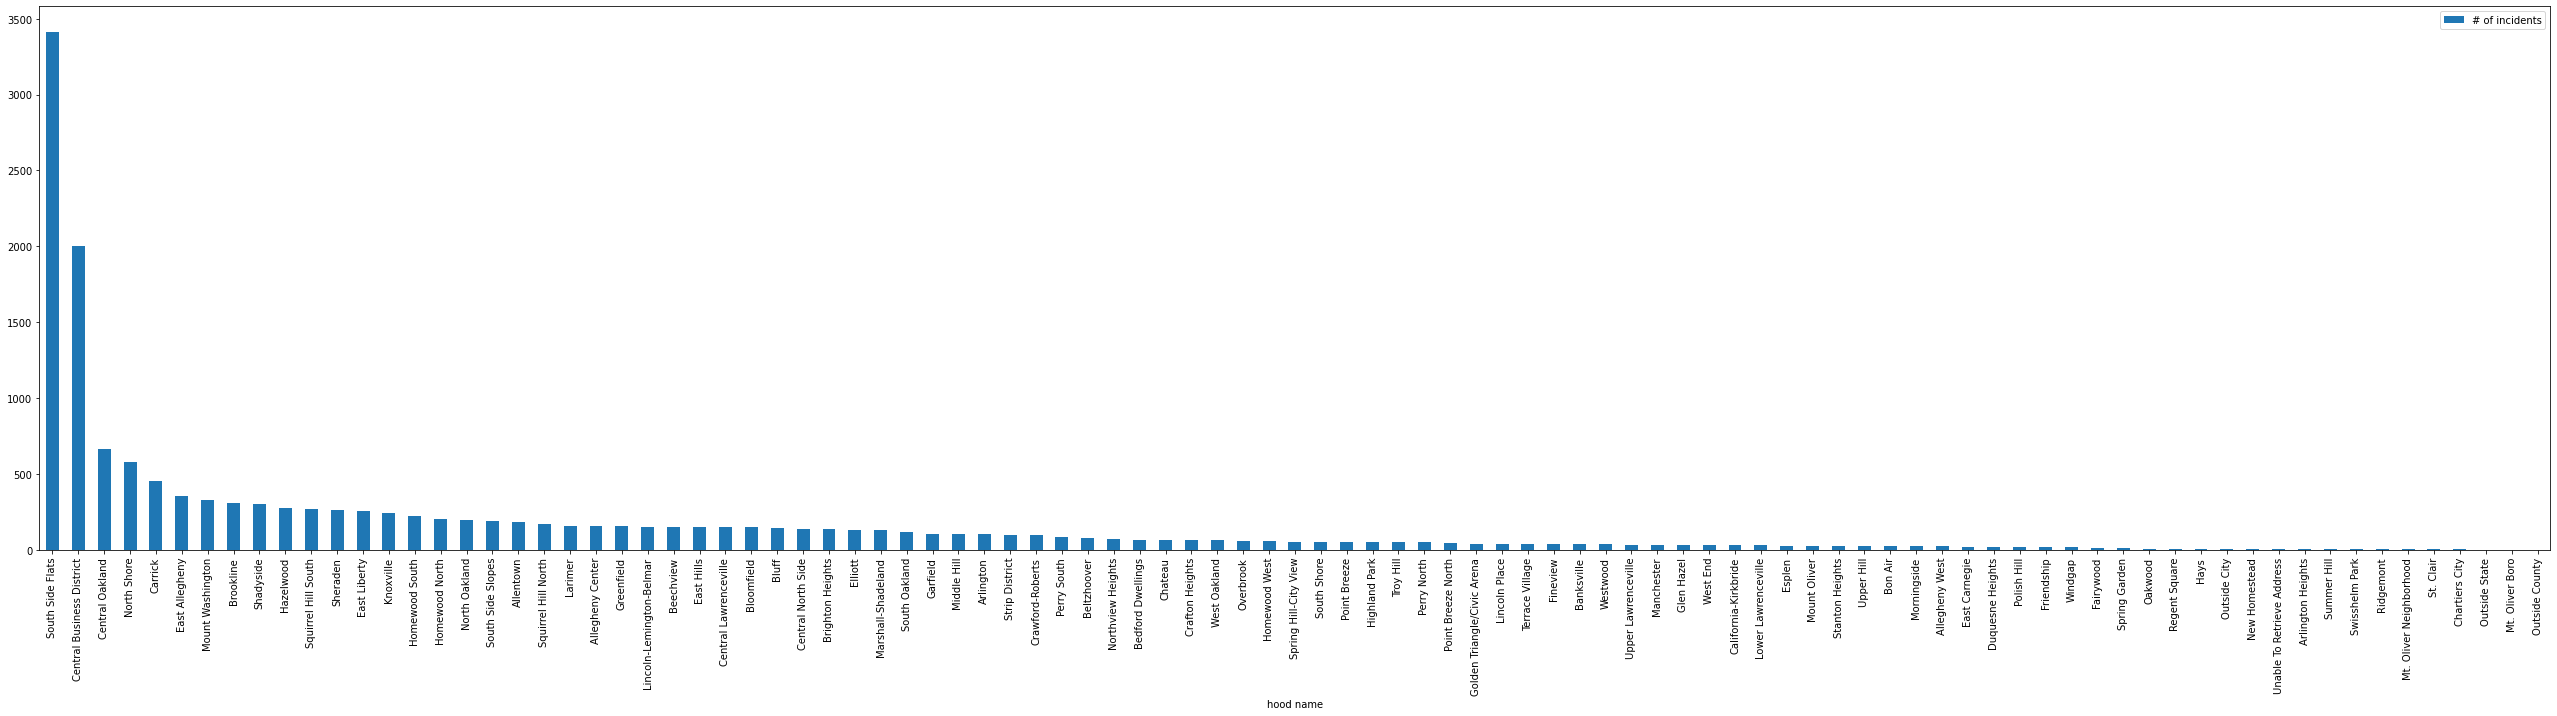

In [4]:
df_citation_frame.sort_values(by = '# of incidents', ascending = False).plot.bar(x = 'hood name', figsize=(45,10))

Conclusion:
Southside Flats has the most non-traffic citations, so we can assume you have a higher probability of witnessing an incident there. Since there are multiple occurences of Mt.Oliver, we will discredit it and name St.Clair the safest city when it comes to non-traffic citations!